In [5]:
import numpy as np 
import pandas as pd 

In [7]:
bank_full='https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/%20Bank%20Direct%20Marketing/bank-full.csv'
bank='https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/%20Bank%20Direct%20Marketing/bank.csv'

data_train=pd.read_csv(bank_full,sep=';')
data_test=pd.read_csv(bank,sep=';')

data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data_train.dropna(axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


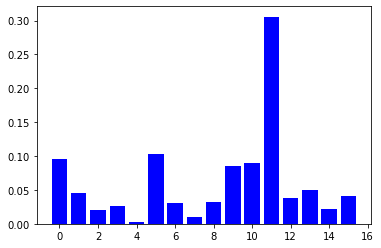

In [9]:
from sklearn import preprocessing
import sklearn as sk
columns=['job','marital','education','default','housing','loan','contact','month','poutcome']
for i in range(len(columns)):
    str_t=sk.preprocessing.LabelEncoder()  #encoding strings into numbers
    str_t.fit(data_train[columns[i]])
    data_train[columns[i]]=str_t.transform(data_train[columns[i]])

a=list(range(data_train.shape[1]-1))

x_train=data_train.iloc[1:,a].values

y_train=data_train.iloc[1:,16].values

y_train=np.where(y_train=='yes',1,0)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


classifier_inform=RandomForestClassifier(criterion='entropy',n_estimators=20,n_jobs=-1)

classifier_inform.fit(x_train,y_train)

inform=classifier_inform.feature_importances_  #informational content of signs

plt.bar(range(x_train.shape[1]),inform,color='blue',align='center')

plt.show()

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


x_train=data_train.iloc[1:,[0,5,9,10,11]].values #the most informative signs

classifier=RandomForestClassifier(criterion='entropy',n_estimators=20,n_jobs=-1)

classifier.fit(x_train,y_train)

pred=classifier.predict(x_train)

print('TRAIN ACCURACY',accuracy_score(pred,y_train))

targets=['no','yes']

print(classification_report(y_train,pred,target_names=targets))

TRAIN ACCURACY 0.9970139349701393
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     39921
         yes       1.00      0.98      0.99      5289

    accuracy                           1.00     45210
   macro avg       1.00      0.99      0.99     45210
weighted avg       1.00      1.00      1.00     45210



In [11]:
for i in range(len(columns)):
    str_t=sk.preprocessing.LabelEncoder()
    str_t.fit(data_test[columns[i]])
    data_test[columns[i]]=str_t.transform(data_test[columns[i]])
    
x_test=data_test.iloc[1:,[0,5,9,10,11]].values   

y_test=data_test.iloc[1:,16].values

y_test=np.where(y_test=='yes',1,0)
pred=classifier.predict(x_test)

print('TEST ACCURACY',accuracy_score(pred,y_test))

print(classification_report(y_test,pred,target_names=targets))

TEST ACCURACY 0.9960176991150442
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      3999
         yes       0.99      0.97      0.98       521

    accuracy                           1.00      4520
   macro avg       1.00      0.99      0.99      4520
weighted avg       1.00      1.00      1.00      4520



In [12]:
from sklearn import linear_model
classif_logit=linear_model.LogisticRegression(penalty='l2',tol=0.0001,solver='saga',C=2.0,max_iter=600)

classif_logit.fit(x_train, y_train)

pred_log_train=classif_logit.predict(x_train)

print('TRAIN ACCURACY',accuracy_score(pred_log_train,y_train))

print(classification_report(y_train,pred_log_train,target_names=targets))

TRAIN ACCURACY 0.8829683698296837
              precision    recall  f1-score   support

          no       0.88      1.00      0.94     39921
         yes       0.47      0.00      0.01      5289

    accuracy                           0.88     45210
   macro avg       0.68      0.50      0.47     45210
weighted avg       0.83      0.88      0.83     45210



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [13]:
pred_log_test=classif_logit.predict(x_test)

print('TEST ACCURACY',accuracy_score(pred_log_test,y_test))

print(classification_report(y_test,pred_log_test,target_names=targets))

TEST ACCURACY 0.8847345132743363
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      3999
         yes       0.50      0.00      0.00       521

    accuracy                           0.88      4520
   macro avg       0.69      0.50      0.47      4520
weighted avg       0.84      0.88      0.83      4520

